In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'taxa_abund_P8_P11_P14_P28_PHYLUM.csv'
data_df = pd.read_csv(file_path)

# Identify columns associated with different DOLs and map them
dol_mapping = {
    'P8': ['2', '11', '22', '25', '40', '46'],
    'P11': ['073A', '075A', '081A', '083A', '085A', '088A', '097A', '105A', '106A', '107A'],
    'P14': ['137A', '140A', '146A', '151A', '156A', '158A', '161A', '162A', '167A', '235A', '258A', '259A', '260A', '261A'],
    'P28': ['111A', '115A', '119A', '120A', '124A', '129A', '134A', '135A']
}

# Clean data: Remove non-numeric values, strip spaces, convert columns to integers
data_df = data_df.rename(columns=lambda x: x.strip())
for col in data_df.columns[1:]:  # Skipping the first column for now
    data_df[col] = data_df[col].astype(str).str.strip()
    data_df[col] = pd.to_numeric(data_df[col], errors='coerce')

data_df.fillna(0, inplace=True)
data_df = data_df.astype({col: int for col in data_df.columns[1:]})

# Sum up the counts by DOL for each bacteria type
dol_sums = {dol: data_df.set_index("class")[cols].sum(axis=1) for dol, cols in dol_mapping.items()}

data_df


,class,2,11,22,25,40,46,073A,075A,081A,...,167A,215A,226A,227A,228A,235A,258A,259A,260A,261A
0,Actinobacteria,0,0,0,0,0,3,36,23,12,...,135,0,0,0,0,0,55,4,0,0
1,Bacteroidetes,262,247,121,86,124,133,2252,161,26,...,7829,14251,56,29,0,37,15228,11376,12784,15518
2,Firmicutes,25948,17078,15080,18620,14877,15144,23822,25777,25720,...,18478,12318,16080,13179,12232,20114,9554,15119,13774,10924
3,Patescibacteria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,5,9
4,Proteobacteria,384,9272,11396,7891,11596,11317,487,636,839,...,146,28,10461,13389,14365,6446,1760,96,0,112
5,Tenericutes,3,0,0,0,0,0,0,0,0,...,9,0,0,0,0,0,0,0,34,34
6,DOL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sample,2,11,22,25,40,46,0,0,0,...,0,0,0,0,0,0,0,0,0,0


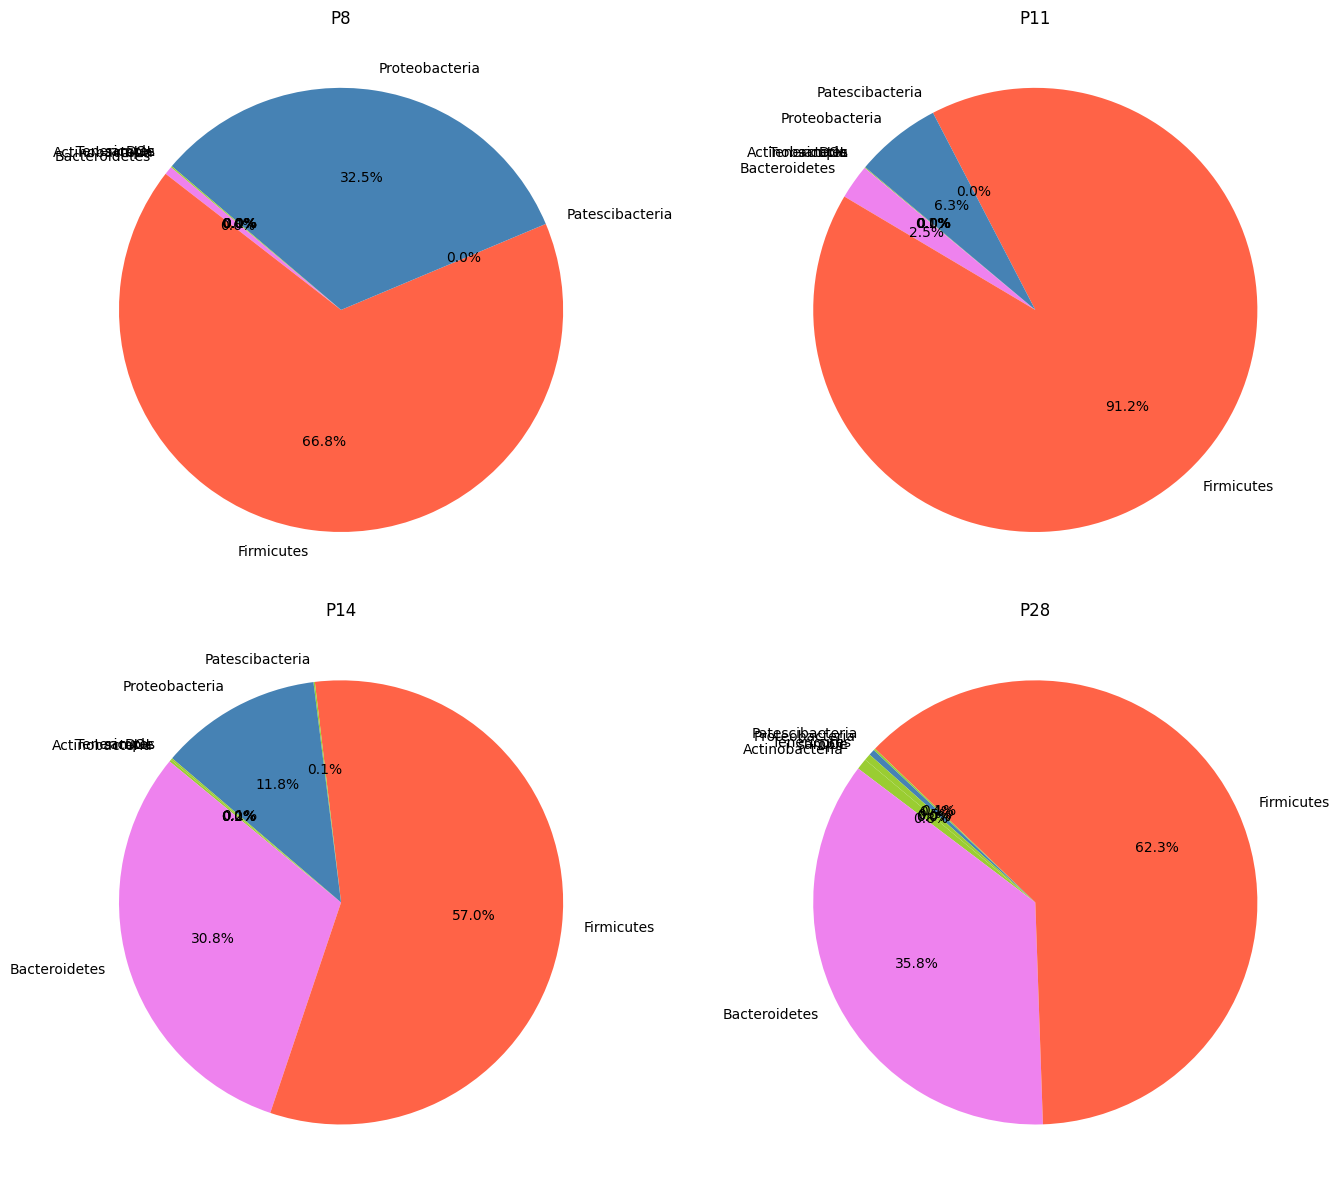

In [26]:
# Color mapping for specific taxa
color_mapping = {
    'Firmicutes': '#FF6347',
    'Proteobacteria': '#4682B4',
    'Bacteroidetes': '#EE82EE',
    'Verrucomicrobia': '#F4A460'
}
default_color = '#9ACD32'

# Assuming dol_sums and top_five_taxa are already defined
# Adjust the plotting code to use the defined colors
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, (dol, sums) in enumerate(dol_sums.items()):
    # Determine the colors for the current DOL based on taxa presence
    colors = [color_mapping.get(tax, default_color) for tax in sums.index]
    
    ax = axes[i//2, i%2]
    ax.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(f'{dol}')

plt.tight_layout()
# /plt.show()
# plt.savefig("pdf_file_path.pdf")